In [1]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np 
from scipy.signal import tf2zpk
import soundfile as sf
from my_functions import lms, plot_weights_evolution, normalize, find_max_step_size, analyze_frequencies
from sklearn.metrics import mean_squared_error

# Applying the LMS on the anechoic audio signal

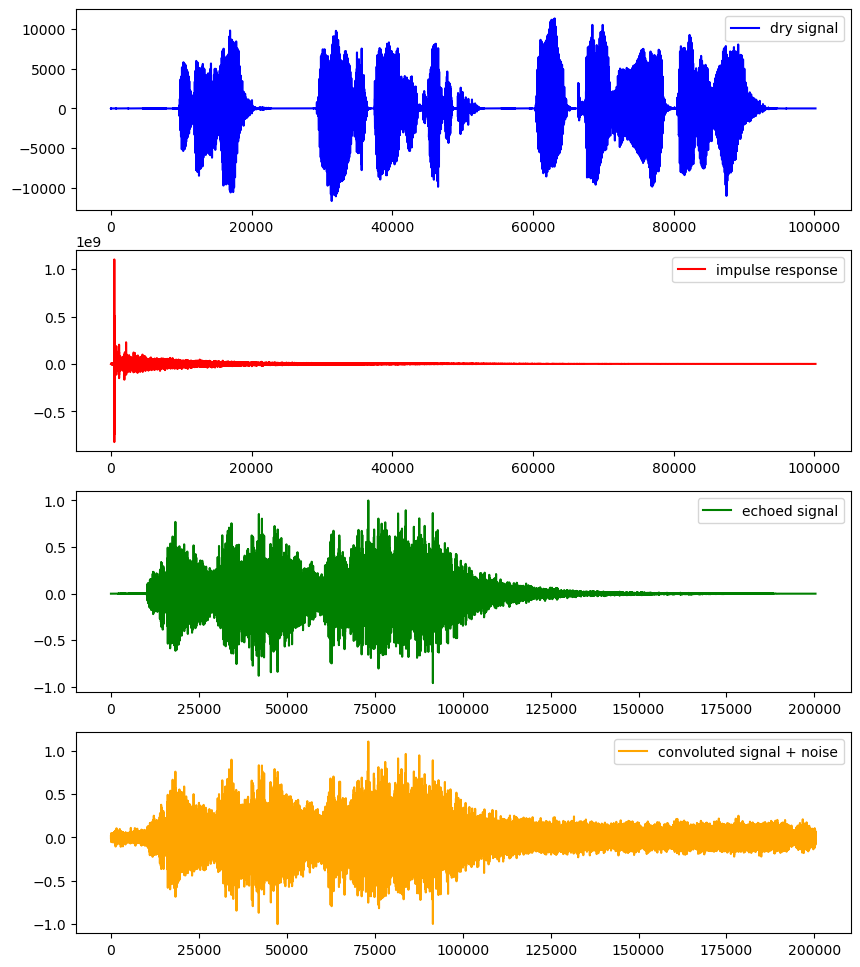

In [2]:
anechoic_audio_impulse_response_convolution_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution_plus_noise.npy")
anechoic_audio_impulse_response_convolution = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution.npy")
anechoic_audio_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_plus_noise.npy")
anechoic_audio = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio.npy")
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")
noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/noise.npy")

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='impulse response')
ax[1].legend()
ax[2].plot(anechoic_audio_impulse_response_convolution, color='green', label='echoed signal')
ax[2].legend()
ax[3].plot(anechoic_audio_impulse_response_convolution_plus_noise, color='orange', label='convoluted signal + noise')
ax[3].legend()

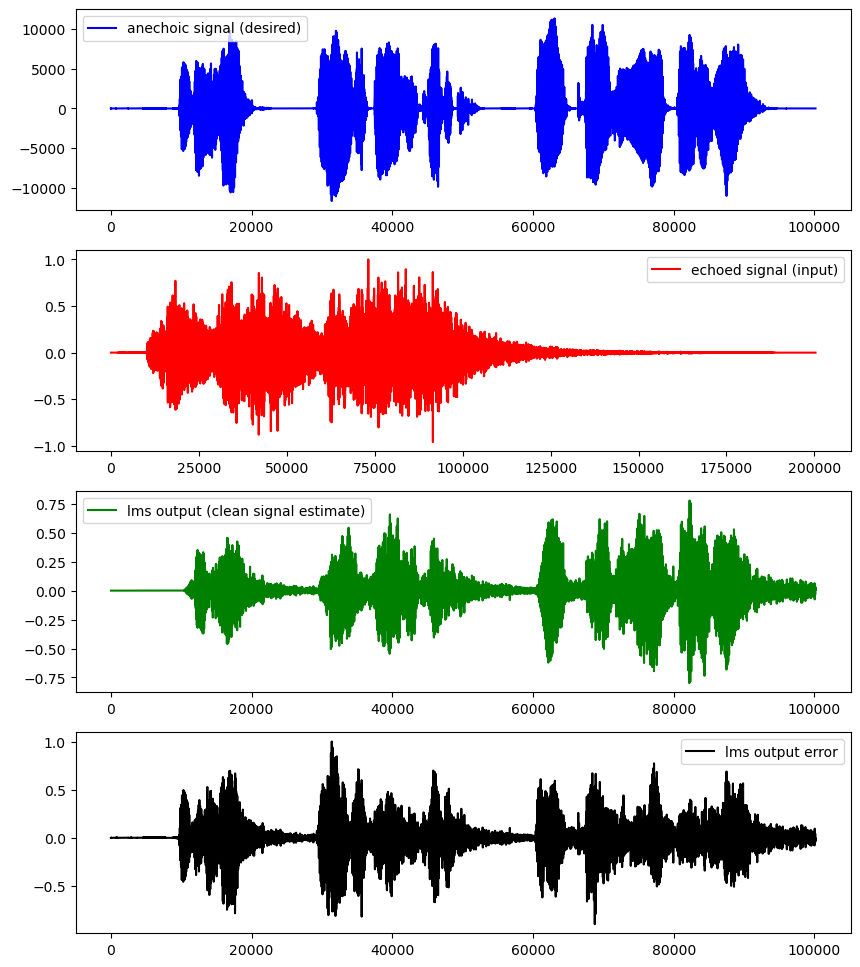

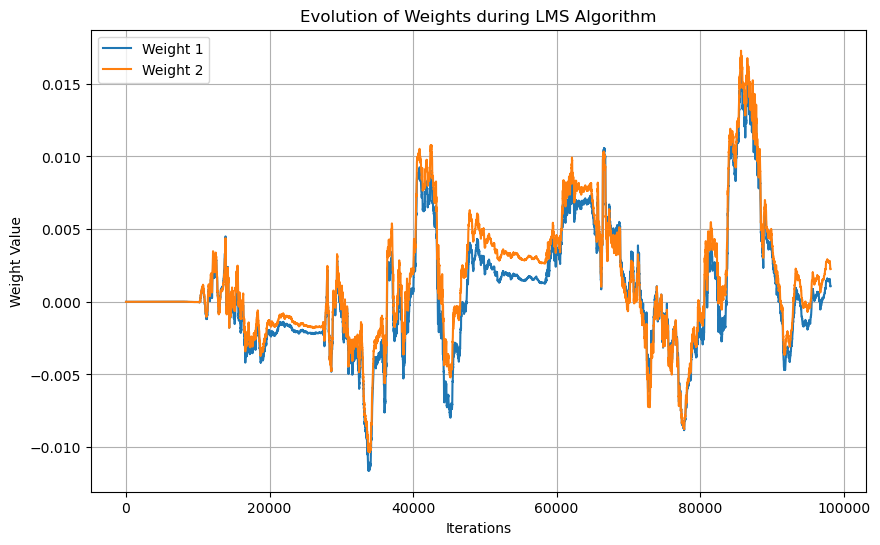

In [3]:
filtering_order = 2000
step_size = 0.001

output, weights, weights_evolution, error = lms(anechoic_audio, anechoic_audio_impulse_response_convolution, step_size, filtering_order)
error = normalize(anechoic_audio) - normalize(output)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='anechoic signal (desired)')
ax[0].legend()
ax[1].plot(anechoic_audio_impulse_response_convolution, color='red', label='echoed signal (input)')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output (clean signal estimate)')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("anechoic_audio.wav", anechoic_audio, 16000)
sf.write("anechoic_audio_impulse_response_convolution.wav", anechoic_audio_impulse_response_convolution, 16000)
sf.write("lms_output_audio.wav", output, 16000)

# Applying echo and LMS on a Sine Wave

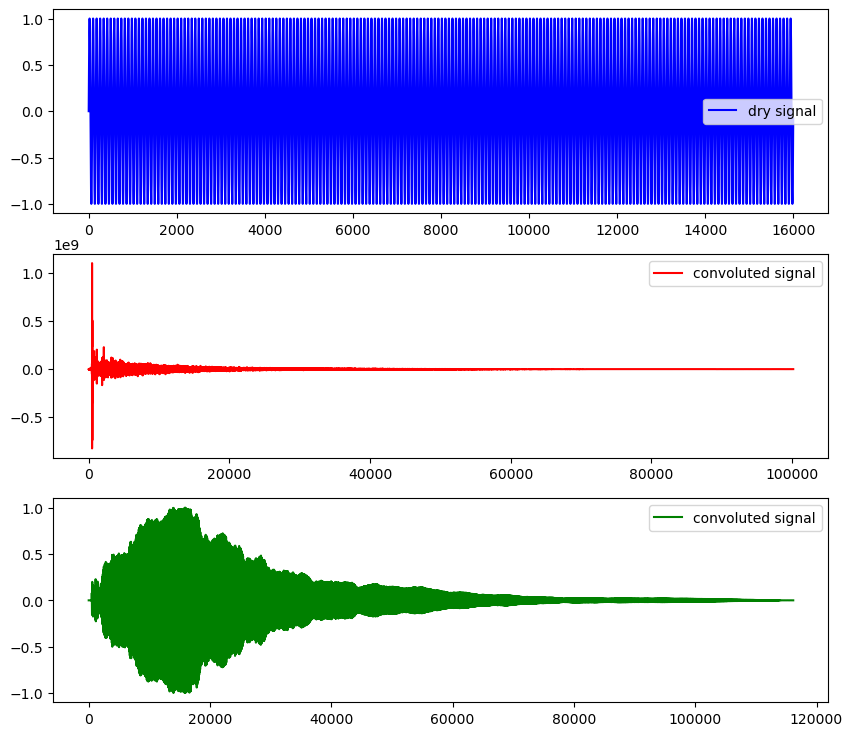

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the sine wave
frequency = 200  # in Hz
amplitude = 1  # in units
sampling_rate = 16000  # in Hz
duration = 1  # in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

echoed_signal = normalize(fftconvolve(sine_wave, impulse_response, mode="full"))
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(sine_wave, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='convoluted signal')
ax[2].legend()

sf.write("sine_wave.wav", sine_wave, sampling_rate)
sf.write("echoed_sine_wave.wav", echoed_signal, sampling_rate)

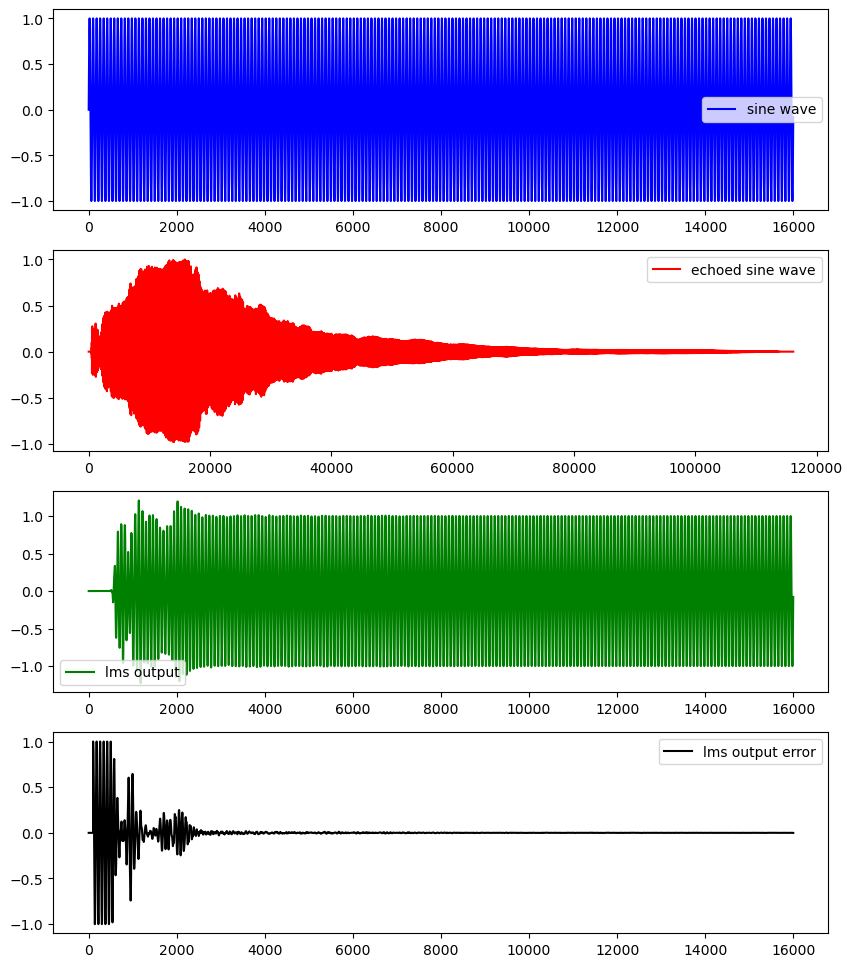

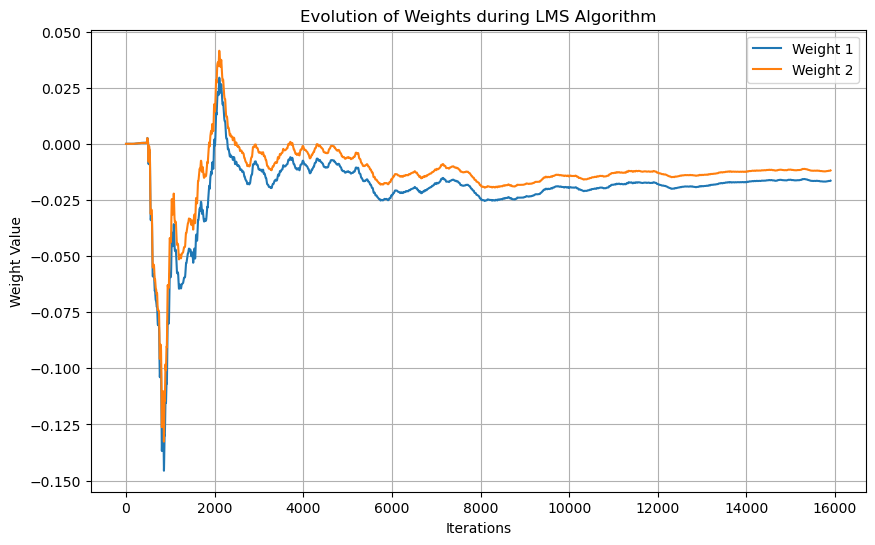

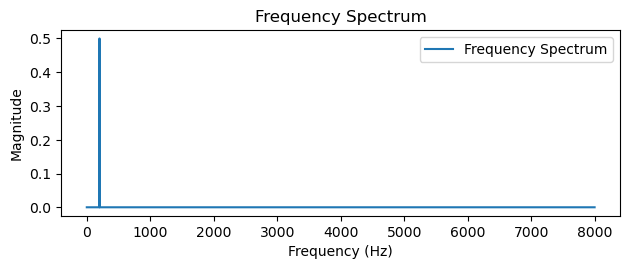

In [27]:
filtering_order = 100
max_step_size = 0.7*find_max_step_size(sine_wave, filtering_order)

output, weights, weights_evolution, error = lms(sine_wave, echoed_signal, max_step_size, filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(sine_wave, color='blue', label='sine wave')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='echoed sine wave')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("lms_sine_wave_output.wav", output, sampling_rate)


freqs, magnitudes = analyze_frequencies(sine_wave, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

# Applying it on more frequencies

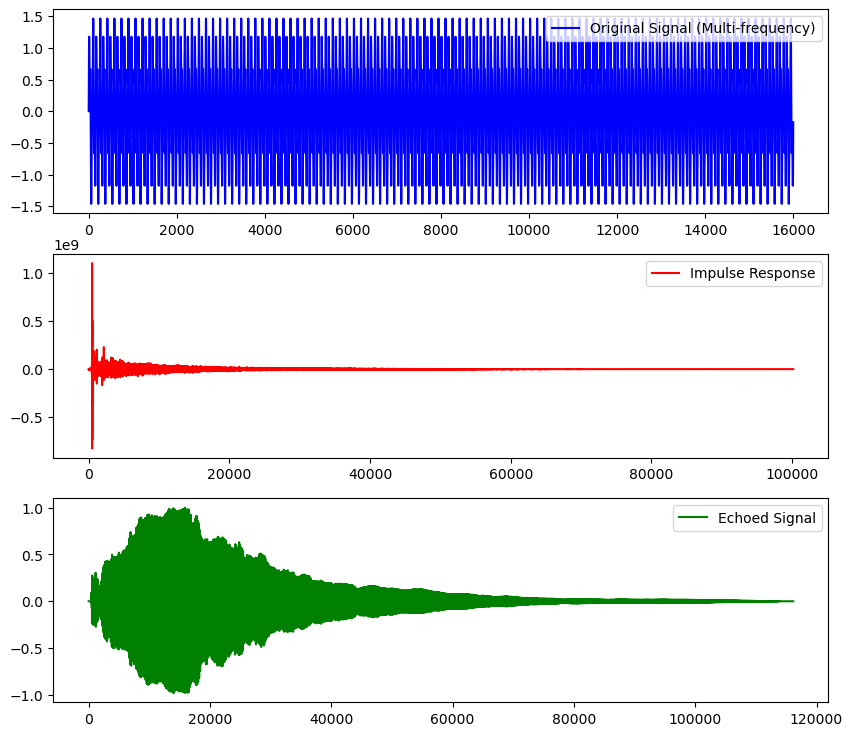

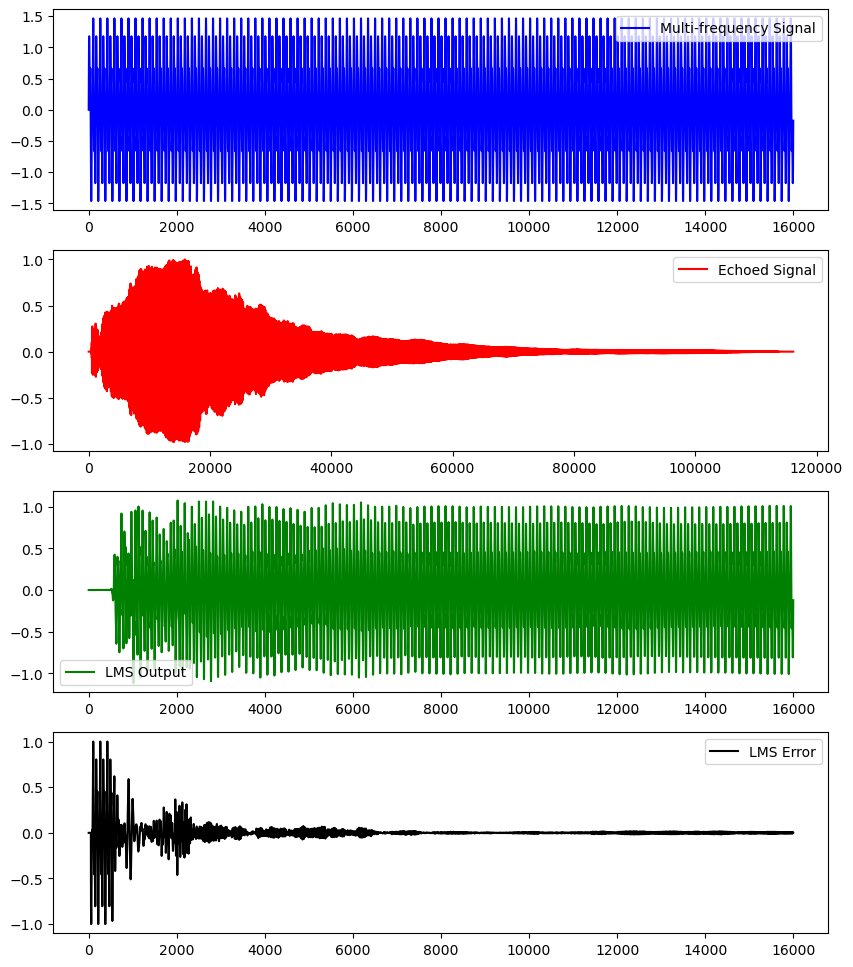

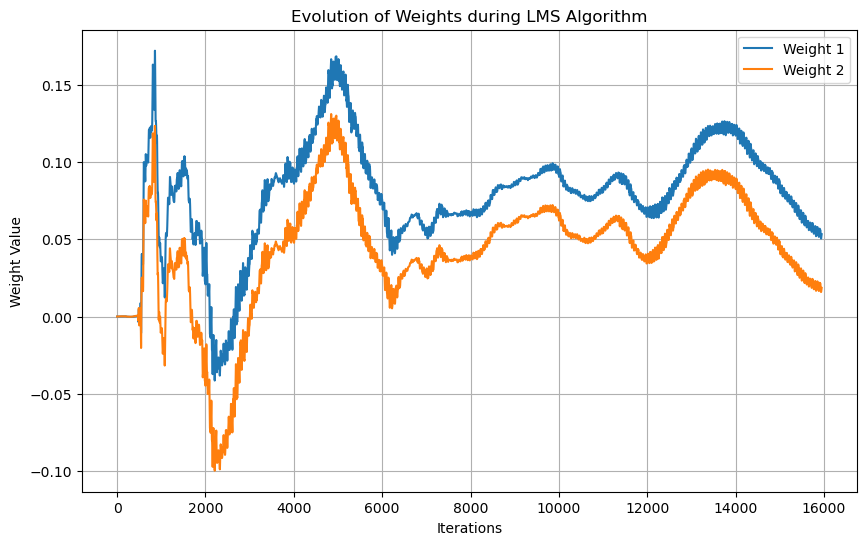

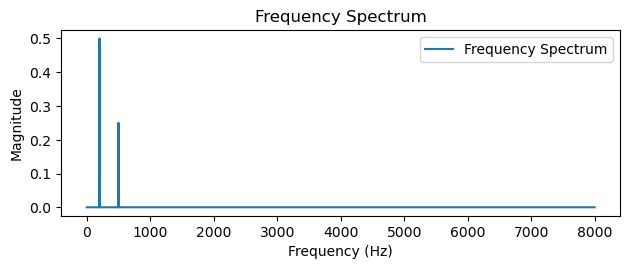

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import fftconvolve

# Define parameters for the sine waves
frequencies = [200, 500]  # in Hz
amplitudes = [1, 0.5]  # in units
sampling_rate = 16000  # in Hz
duration = 1  # in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the signal by summing multiple sine waves with different frequencies
multi_frequency_signal = np.zeros_like(t)
for f, a in zip(frequencies, amplitudes):
    multi_frequency_signal += a * np.sin(2 * np.pi * f * t)

# Load impulse response for the echo
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

# Generate echoed signal by convolving with impulse response
echoed_signal = normalize(fftconvolve(multi_frequency_signal, impulse_response, mode="full"))

# Plot the original multi-frequency signal, impulse response, and echoed signal
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(multi_frequency_signal, color='blue', label='Original Signal (Multi-frequency)')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='Impulse Response')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='Echoed Signal')
ax[2].legend()

# Save the multi-frequency and echoed signals as WAV files
sf.write("multi_frequency_signal.wav", multi_frequency_signal, sampling_rate)
sf.write("echoed_multi_frequency_signal.wav", echoed_signal, sampling_rate)

# LMS parameters
filtering_order = 50
max_step_size = 0.5 * find_max_step_size(multi_frequency_signal, filtering_order)

# Apply LMS adaptive filtering
output, weights, weights_evolution, error = lms(multi_frequency_signal, echoed_signal, max_step_size, filtering_order)

# Plot the results: multi-frequency signal, echoed signal, LMS output, and LMS error
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(multi_frequency_signal, color='blue', label='Multi-frequency Signal')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='Echoed Signal')
ax[1].legend()
ax[2].plot(output, color='green', label='LMS Output')
ax[2].legend()
ax[3].plot(error, color='black', label='LMS Error')
ax[3].legend()

plot_weights_evolution(weights_evolution)

# Save the LMS filtered output to a WAV file
sf.write("lms_multi_frequency_output.wav", output, sampling_rate)

freqs, magnitudes = analyze_frequencies(multi_frequency_signal, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()


# Is a Sine Wave WSS?

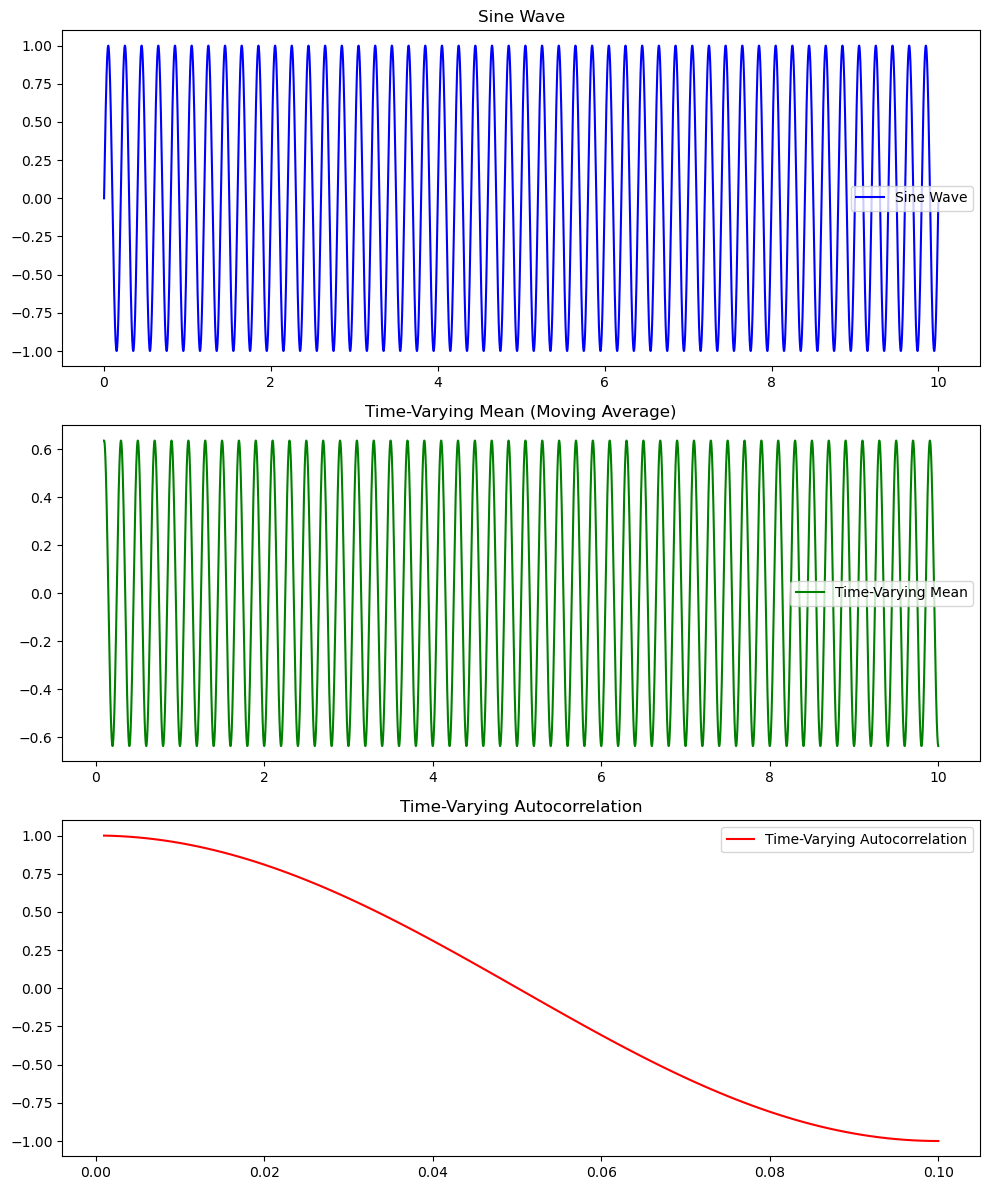

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sine wave
frequency = 5  # frequency of the sine wave (Hz)
sampling_rate = 1000  # sampling rate (Hz)
duration = 10  # duration of the signal (seconds)

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave signal
sine_wave = np.sin(2 * np.pi * frequency * t)

# Time-varying mean (moving average)
window_size = 100  # window size for moving average
moving_mean = np.convolve(sine_wave, np.ones(window_size)/window_size, mode='valid')

# Time-varying autocorrelation (using a sliding window approach)
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the sine wave
def autocorr_function(signal, lag):
    """Compute the autocorrelation for a given lag."""
    return np.corrcoef(signal[:-lag], signal[lag:])[0, 1]

lags = np.arange(1, window_size+1)
moving_autocorr = np.array([autocorr_function(sine_wave, lag) for lag in lags])

# Adjust the time vector to match the lengths of the results
t_mean = t[window_size-1:]  # Time vector for moving mean
t_autocorr = lags / sampling_rate  # Time vector for autocorrelation (scaled by sampling rate)

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the sine wave
ax[0].plot(t, sine_wave, color='blue', label='Sine Wave')
ax[0].set_title('Sine Wave')
ax[0].legend()

# Plot the time-varying mean (moving average)
ax[1].plot(t_mean, moving_mean, color='green', label='Time-Varying Mean')
ax[1].set_title('Time-Varying Mean (Moving Average)')
ax[1].legend()

# Plot the time-varying autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()


# Spectral Frequency Analysis: Anechoic Audio vs. Sine Wave

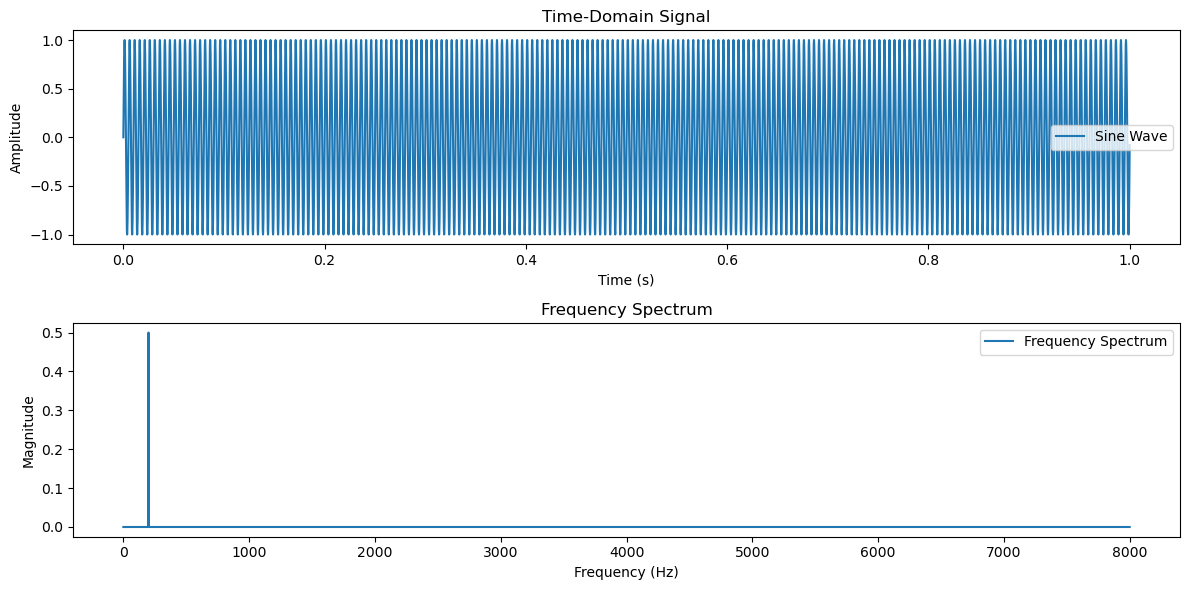

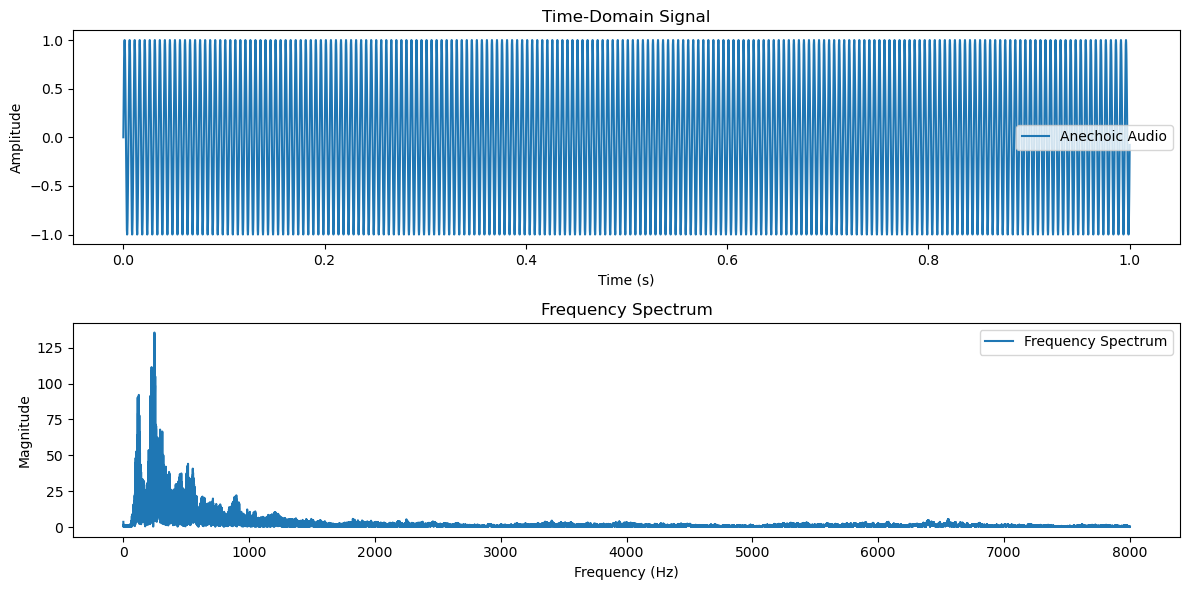

In [11]:
freqs, magnitudes = analyze_frequencies(sine_wave, 16000)

# Plot time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave, label="Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Signal")
plt.legend()

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

freqs, magnitudes = analyze_frequencies(anechoic_audio, 16000)

# Plot time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave, label="Anechoic Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Signal")
plt.legend()

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

# Is the Anechoic Audio WSS?

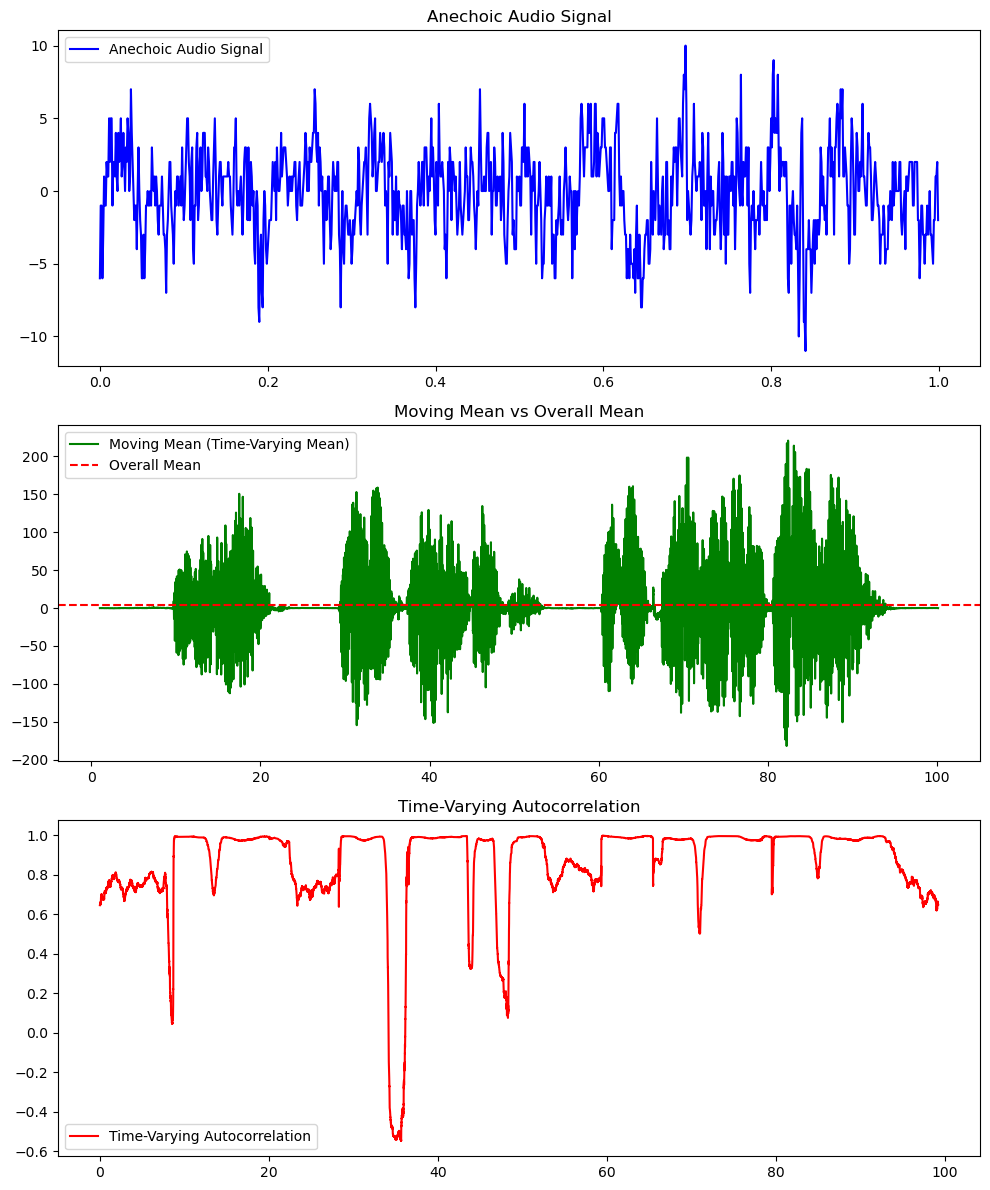

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'anechoic_audio' is your numpy array representing the audio signal
# You can load it from a file using soundfile or another library
import soundfile as sf

# Load audio file if needed (uncomment if required)
# anechoic_audio, sampling_rate = sf.read("your_audio_file.wav")

# Check if the signal has a constant mean over time (WSS property)
window_size = 1000  # Window size for moving average to check mean stability
moving_mean = np.convolve(anechoic_audio, np.ones(window_size)/window_size, mode='valid')

# Check the mean of the whole signal (single value)
overall_mean = np.mean(anechoic_audio)

# Time vector for plotting (same as your audio signal length)
t = np.arange(len(anechoic_audio)) / sampling_rate

# Check the autocorrelation function for the signal
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the audio signal
moving_autocorr = autocorrelation(anechoic_audio, window_size)

# Adjust the time vector for autocorrelation
t_autocorr = t[:len(moving_autocorr)]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the original audio signal (first 1 second for clarity)
ax[0].plot(t[:sampling_rate], anechoic_audio[:sampling_rate], color='blue', label='Anechoic Audio Signal')
ax[0].set_title('Anechoic Audio Signal')
ax[0].legend()

# Plot the moving mean
ax[1].plot(t[window_size-1:], moving_mean, color='green', label='Moving Mean (Time-Varying Mean)')
ax[1].axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean')
ax[1].set_title('Moving Mean vs Overall Mean')
ax[1].legend()

# Plot the autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()

# If the moving mean is stable and the autocorrelation depends only on the lag, the signal is WSS.


# How does these signals compare to the WSSness of a Impulse Train?

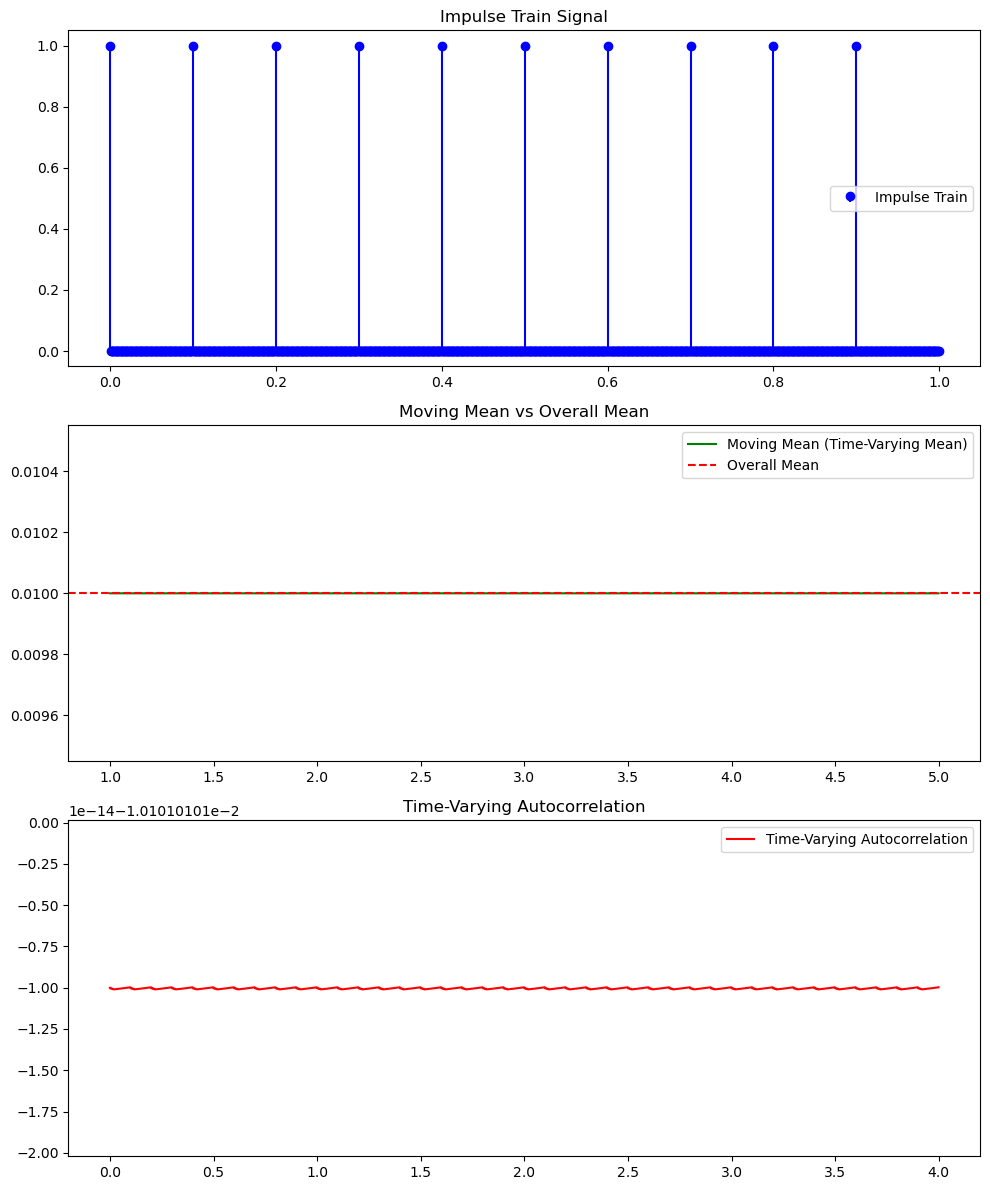

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the impulse train
sampling_rate = 1000  # 1 kHz sampling rate
duration = 5  # 2 seconds duration
impulse_interval = 0.1  # 100 impulses per second (0.1s interval)

# Generate time vector
t = np.arange(0, duration, 1/sampling_rate)

# Create an impulse train (dirac delta function approximated as a high value spike)
impulse_train = np.zeros_like(t)
impulse_train[::int(sampling_rate * impulse_interval)] = 1  # Place 1 at every impulse_interval

# Check if the signal has a constant mean over time (WSS property)
window_size = 1000  # Window size for moving average to check mean stability
moving_mean = np.convolve(impulse_train, np.ones(window_size)/window_size, mode='valid')

# Check the mean of the whole signal (single value)
overall_mean = np.mean(impulse_train)

# Autocorrelation function (for the impulse train)
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the impulse train
moving_autocorr = autocorrelation(impulse_train, window_size)

# Adjust the time vector for autocorrelation
t_autocorr = t[:len(moving_autocorr)]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the impulse train
ax[0].stem(t[:sampling_rate], impulse_train[:sampling_rate], basefmt=" ", linefmt="b-", markerfmt="bo", label='Impulse Train')
ax[0].set_title('Impulse Train Signal')
ax[0].legend()

# Plot the moving mean
ax[1].plot(t[window_size-1:], moving_mean, color='green', label='Moving Mean (Time-Varying Mean)')
ax[1].axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean')
ax[1].set_title('Moving Mean vs Overall Mean')
ax[1].legend()

# Plot the autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()

# Interpretation:
# - If the moving mean is stable and the autocorrelation depends only on the lag, the impulse train is WSS.


# Trying to recover the Impulse Train audio using LMS

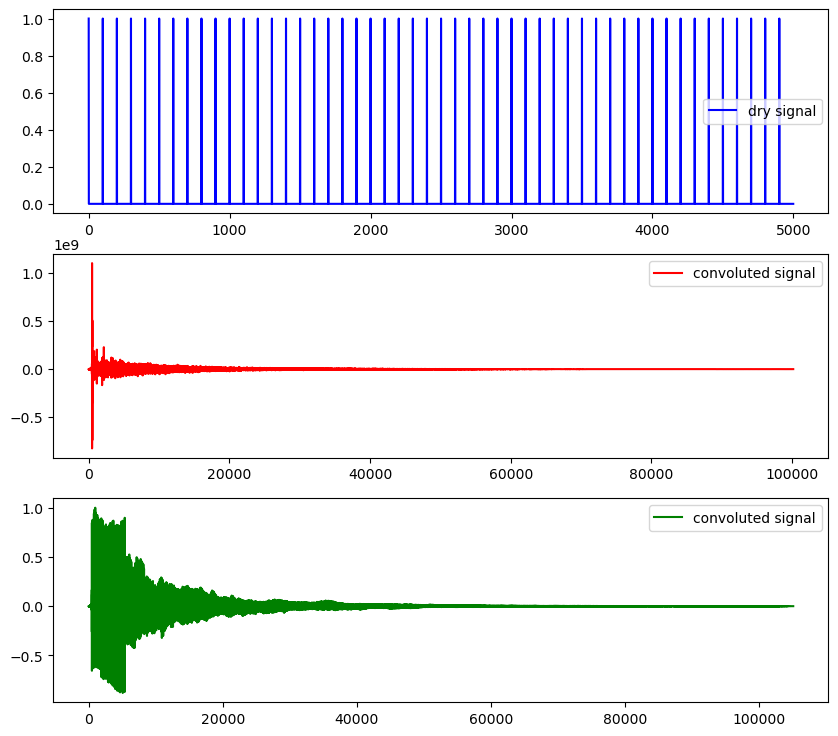

In [4]:
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

echoed_signal = normalize(fftconvolve(impulse_train, impulse_response, mode="full"))
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(impulse_train, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='convoluted signal')
ax[2].legend()

sf.write("impulse_train.wav", impulse_train, sampling_rate)
sf.write("echoed_impulse_train.wav", echoed_signal, sampling_rate)

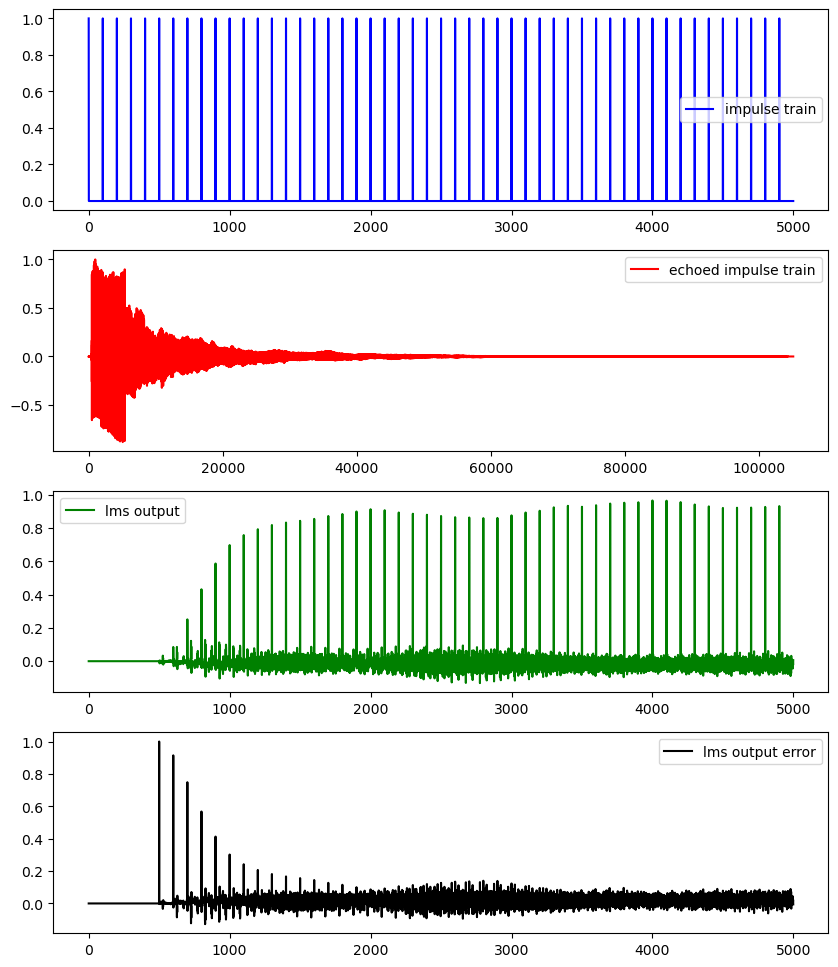

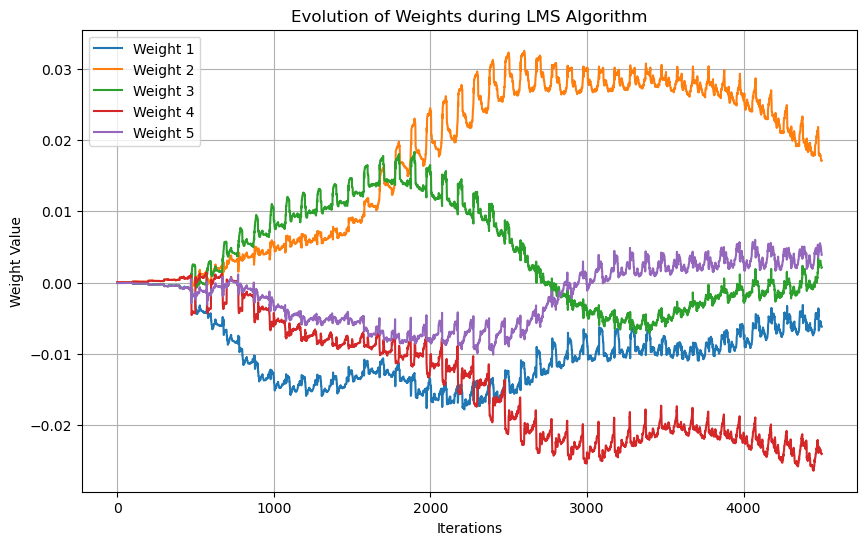

In [15]:
filtering_order = 500
max_step_size = 0.1*find_max_step_size(impulse_train, filtering_order)
output, weights, weights_evolution, error = lms(impulse_train, echoed_signal[:len(impulse_train)], max_step_size, filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(impulse_train, color='blue', label='impulse train')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='echoed impulse train')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()

sf.write("lms_impulse_train_output.wav", output, sampling_rate)

plot_weights_evolution(weights_evolution, max_weights=5)

# Trying the system identification type approach

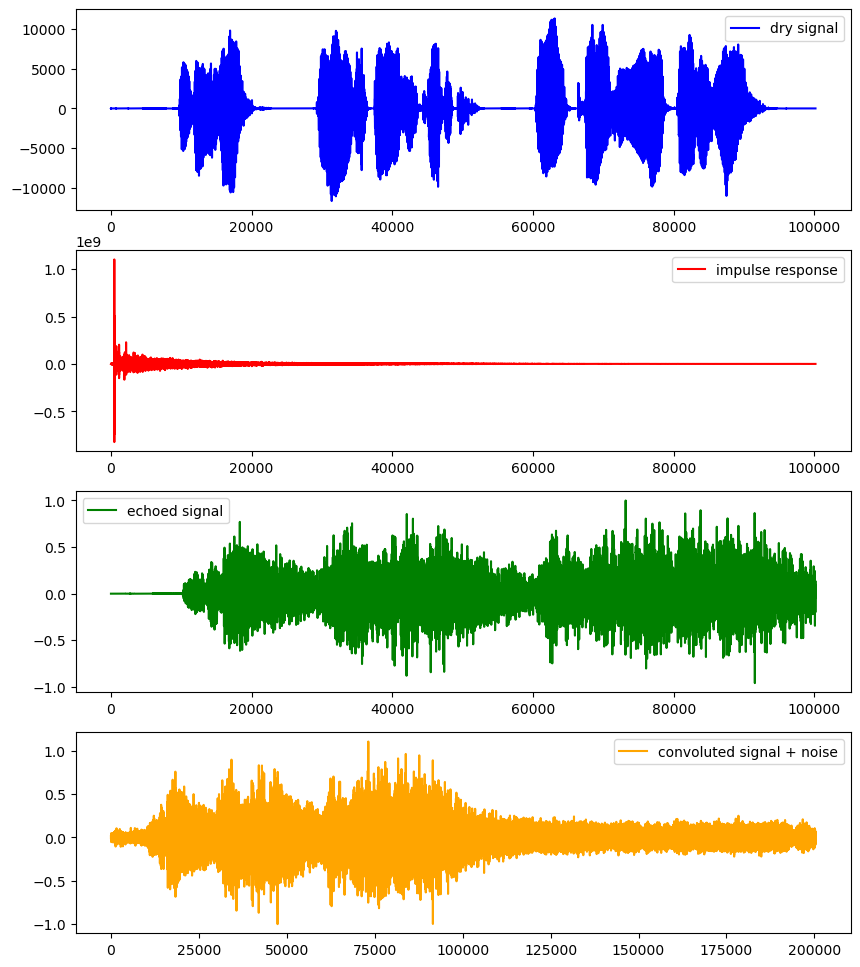

In [12]:
anechoic_audio_impulse_response_convolution_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution_plus_noise.npy")
anechoic_audio_impulse_response_convolution = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution.npy")
anechoic_audio_impulse_response_convolution = anechoic_audio_impulse_response_convolution[:len(anechoic_audio)]
anechoic_audio_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_plus_noise.npy")
anechoic_audio = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio.npy")
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")
noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/noise.npy")

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='impulse response')
ax[1].legend()
ax[2].plot(anechoic_audio_impulse_response_convolution, color='green', label='echoed signal')
ax[2].legend()
ax[3].plot(anechoic_audio_impulse_response_convolution_plus_noise, color='orange', label='convoluted signal + noise')
ax[3].legend()

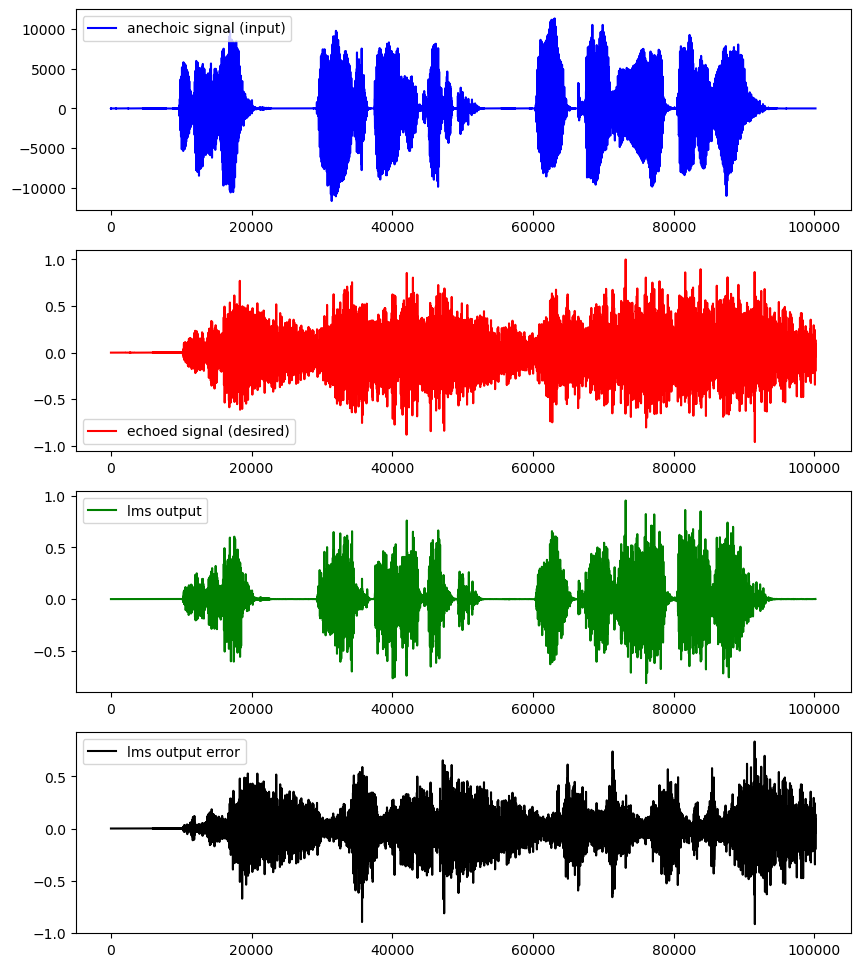

: 

In [24]:
filtering_order = 100
step_size = 0.1*find_max_step_size(anechoic_audio_impulse_response_convolution, filtering_order)

output, weights, weights_evolution, error = lms(anechoic_audio_impulse_response_convolution, anechoic_audio, step_size, filtering_order)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='anechoic signal (input)')
ax[0].legend()
ax[1].plot(anechoic_audio_impulse_response_convolution, color='red', label='echoed signal (desired)')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("anechoic_audio.wav", anechoic_audio, 16000)
sf.write("anechoic_audio_impulse_response_convolution.wav", anechoic_audio_impulse_response_convolution, 16000)
sf.write("lms_echo_estimation.wav", output, 16000)
sf.write("lms_error_signal_(clean_signal).wav", output, 16000)

mse = mean_squared_error(anechoic_audio_impulse_response_convolution, output)
print(f"MSE: {mse:.6f}")


# Trying Sub-band adaptive filtering

200319
100160


ValueError: shapes (49,) and (50,) not aligned: 49 (dim 0) != 50 (dim 0)

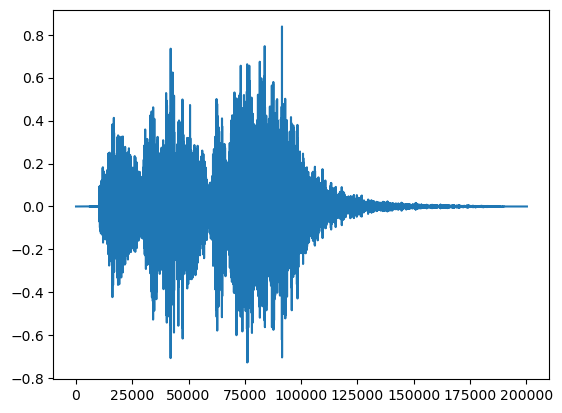

In [17]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter Bank: Example with bandpass filters
def bandpass_filter_bank(signal, num_bands, fs, low_freq, high_freq):
    """
    Create a filter bank and decompose the signal into multiple subbands.
    """
    subbands = []
    band_width = (high_freq - low_freq) / num_bands
    for i in range(num_bands):
        low = low_freq + i * band_width
        high = low + band_width
        b, a = sig.butter(4, [low, high], btype='bandpass', fs=fs)
        subband = sig.filtfilt(b, a, signal)
        subbands.append(subband)
    return np.array(subbands)

# Main function for Subband Adaptive Filtering
def subband_adaptive_filtering(x, d, num_bands, filter_order, step_size, fs, low_freq, high_freq):
    # Step 1: Create subband filter bank
    subbands = bandpass_filter_bank(x, num_bands, fs, low_freq, high_freq)
    
    # Step 2: Apply LMS to each subband
    outputs = []
    errors = []
    for i in range(num_bands):
        plt.plot(subbands[i]) 
        print(len(subbands[i]))
        print(len(d))
        output, weights, error = lms(subbands[i], d, step_size, filter_order)
        outputs.append(output)
        errors.append(error)
    
    # Step 3: Combine the outputs from all subbands
    combined_output = np.sum(outputs, axis=0)
    combined_error = np.sum(errors, axis=0)

    return combined_output, combined_error

# LMS parameters
filter_order = 50
step_size = 0.01
num_bands = 16  # Number of subbands
low_freq = 20  # Lowest frequency of the bandpass filters
high_freq = 5000  # Highest frequency of the bandpass filters
fs = 16000

# Apply subband adaptive filtering
output, error = subband_adaptive_filtering(anechoic_audio_impulse_response_convolution, anechoic_audio, num_bands, filter_order, step_size, fs, low_freq, high_freq)

# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(anechoic_audio, label="Anechoic Signal")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(echoed_signal, label="Echoed Signal")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(output, label="Filtered Output")
plt.legend()

plt.show()